# 510 - Deltares drought data

In [1]:
from deltares_drought_functions import *

## Open Netcdf file

In [2]:
file = r"D:\Rode Kruis\510 - Anticipatory Action - Next Generation Drought Index\20240914_2300_wflow_sbm_ethiopia_20240823_forecast_seas5_drought_indicators.nc"
nc = Dataset(file, 'r')
nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6,UGRID-0.9
    title: Data
    institution: Deltares
    source: Export NETCDF-CF_GRID from Delft-FEWS
    history: 2024-09-21 22:01:34 GMT: exported from Delft-FEWS
    references: http://www.delft-fews.com
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    summary: Data exported from Delft-FEWS
    date_created: 2024-09-21 22:01:34 GMT
    fews_implementation_version: 2023.02
    fews_patch_number: 128713
    fews_build_number: 126552
    dimensions(sizes): time(107), analysis_time(1), realization(51), y(299), x(383)
    variables(dimensions): float64 time(time), float64 analysis_time(analysis_time), int32 realization(realization), float64 y(y), float64 x(x), float64 z(y, x), int32 crs(), float32 qa(time, realization, y, x), float32 smdi(time, realization, y, x), float32 etdi(time, realization, y, x)
    groups: 

## Check parameters

The parameters are constructed as a 4D array with:
- 107 days of forecast
- 51 ensemble members
- 299 y coordinates
- 383 x coordinates

Variables are: 
- time
- analysis time
- realization
- y
- x
- z
- crs
- **qa: ?**
- **smdi: Soil Moisture Deficit Index**
- **etdi: Evapotranspiration Deficit Index**

In [3]:
%%time

smdi = np.array(nc.variables["smdi"])
etdi = np.array(nc.variables["etdi"])
qa = np.array(nc.variables["qa"])
smdi.shape

CPU times: total: 26 s
Wall time: 26 s


(107, 51, 299, 383)

## Plot a timeseries for all ensemble members for a specific locations
It will find the closest pixel center near your coordinates

The red line is the median of all ensembles

CPU times: total: 109 ms
Wall time: 108 ms


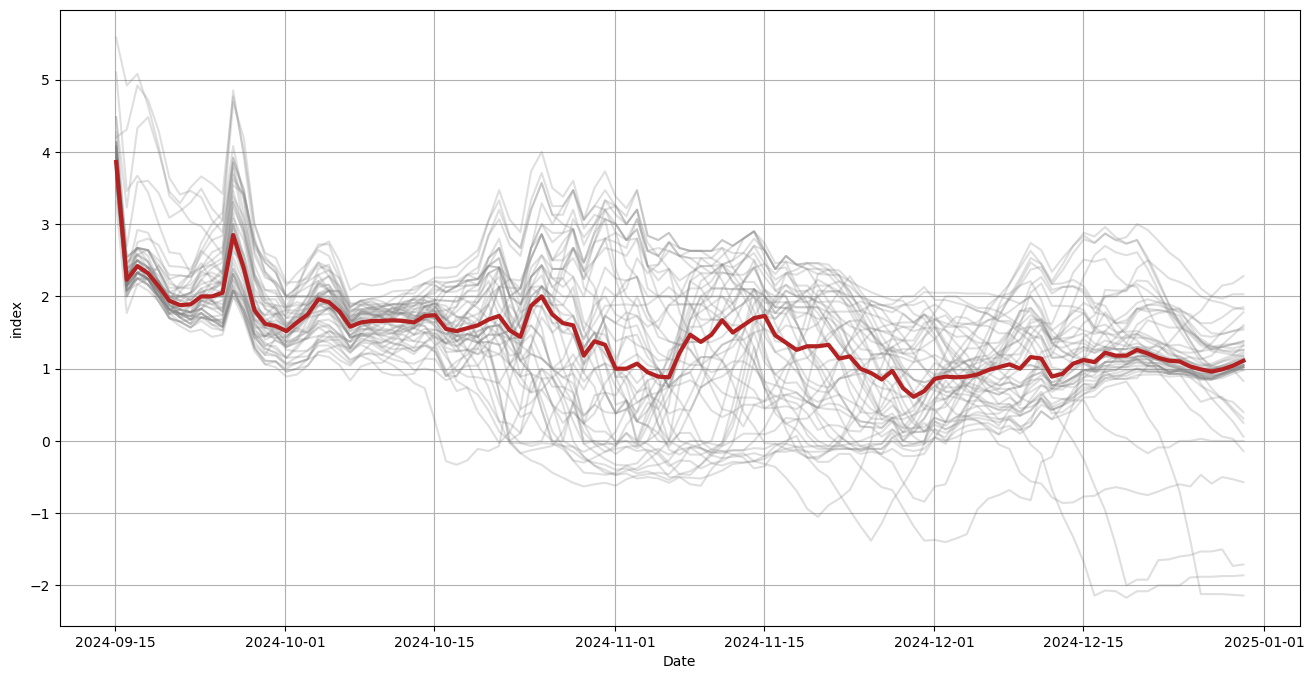

In [4]:
%%time

x = 33.5125011
y = 8.7
fig = plot_forecast_timeseries(dataset=nc, parameter=etdi, x=x, y=y)

## Plot a spatial map for a certain forecast date
You can define which three percentiles to visualize


CPU times: total: 1.47 s
Wall time: 1.47 s


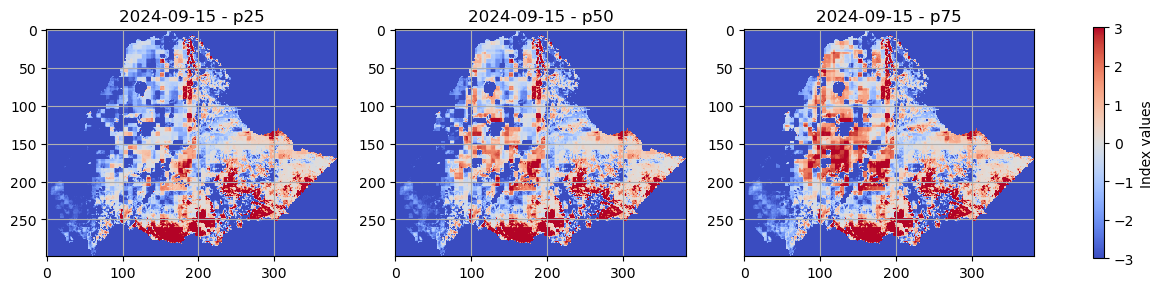

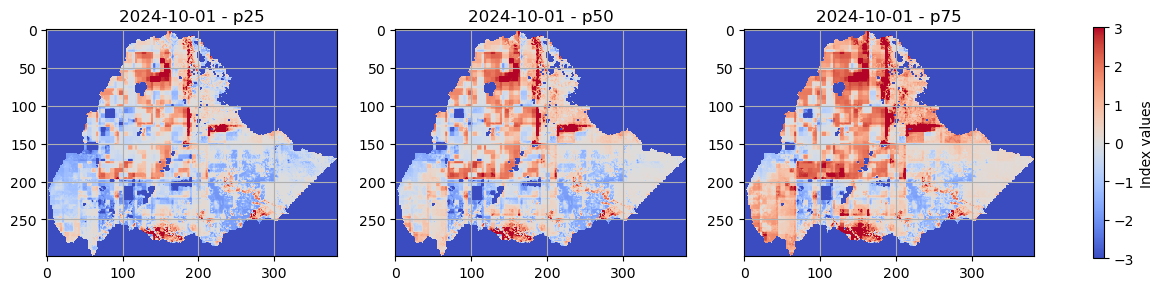

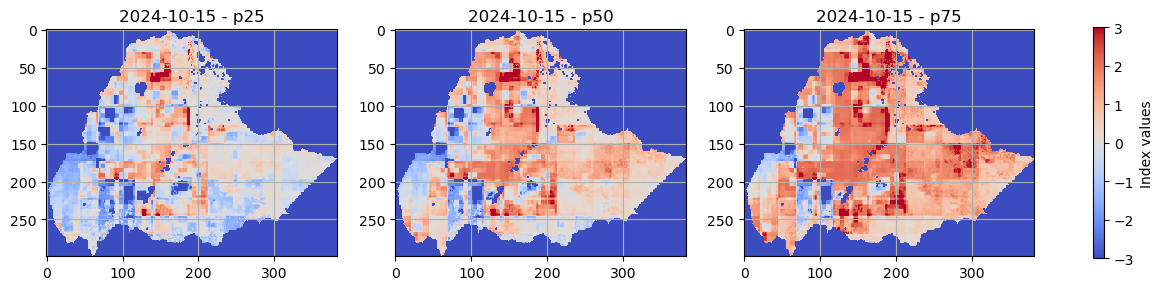

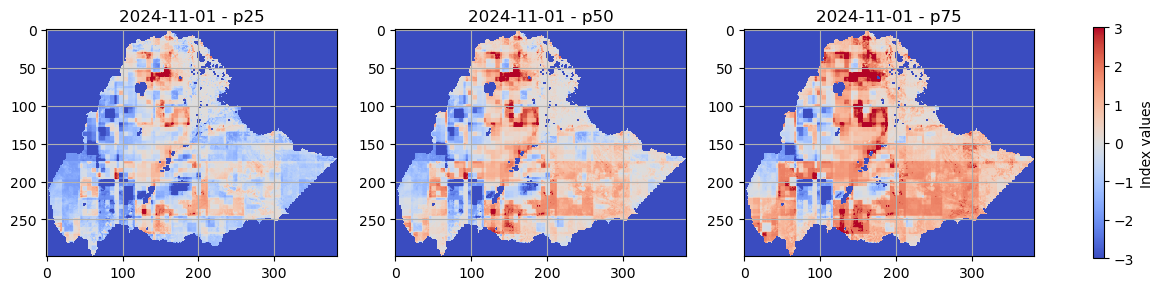

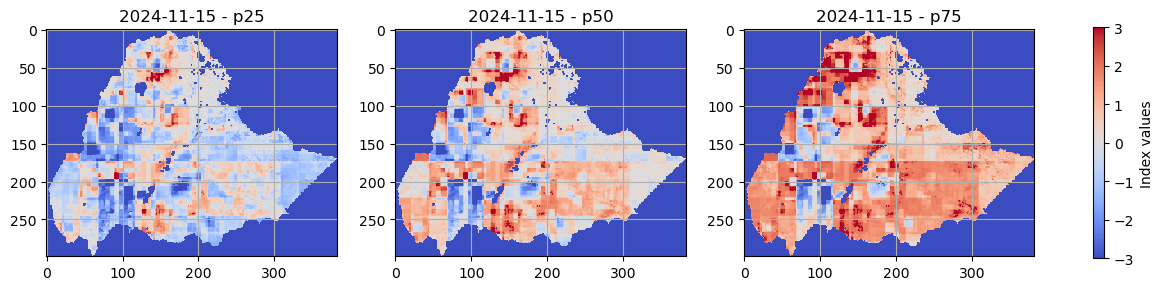

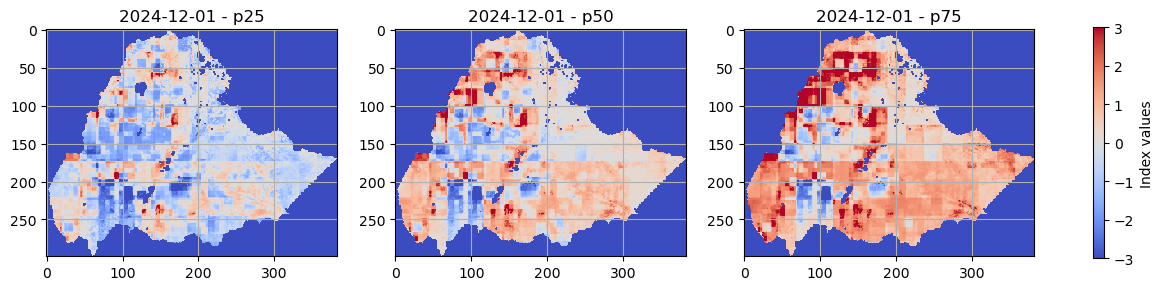

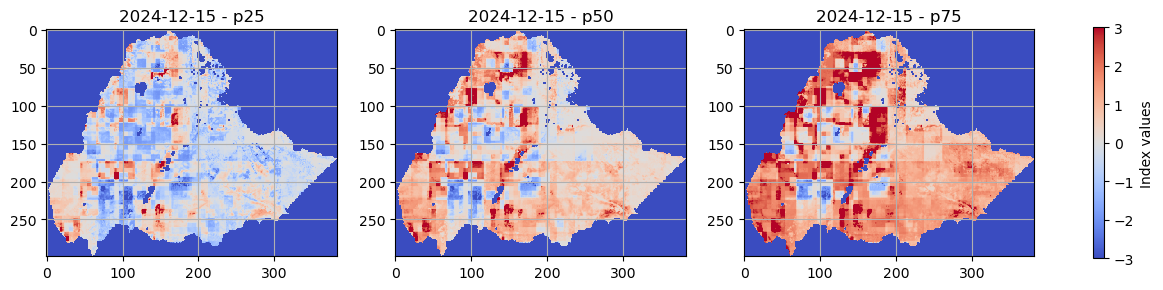

In [5]:
%%time

for timestamp in [
    "2024-09-15", 
    "2024-10-01",
    "2024-10-15",
    "2024-11-01",
    "2024-11-15",
    "2024-12-01",
    "2024-12-15",
]:
    fig = plot_forecast_spatial(
        dataset=nc,
        parameter=smdi,
        timestamp=timestamp,
        percentiles=[25, 50, 75],
        vmin=-3,
        vmax=3,
        colormap="coolwarm",
    )

<Axes: >

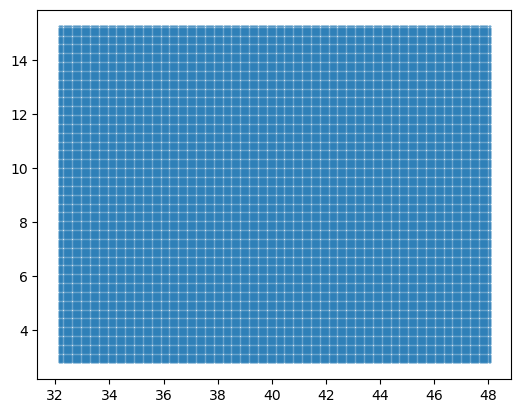

In [6]:
gdf = pixels_to_gdf(nc)
gdf.plot(markersize=0.1)

In [7]:
file = r"D:\Rode Kruis\510 - Anticipatory Action - Next Generation Drought Index\wflow_sbm_ethiopia_20240823_climatology.nc"
nc_climate = Dataset(file, 'r')
nc_climate

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6,UGRID-0.9
    title: Data
    institution: Deltares
    source: Export NETCDF-CF_GRID from Delft-FEWS
    history: 2024-08-26 14:15:37 GMT: exported from Delft-FEWS
    references: http://www.delft-fews.com
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    summary: Data exported from Delft-FEWS
    date_created: 2024-08-26 14:15:37 GMT
    fews_implementation_version: 2023.02
    fews_patch_number: 128713
    fews_build_number: 126552
    dimensions(sizes): time(367), analysis_time(1), realization(40), y(299), x(383)
    variables(dimensions): float64 time(time), float64 analysis_time(analysis_time), int32 realization(realization), float64 y(y), float64 x(x), float64 z(y, x), int32 crs(), float32 Q(time, realization, y, x), float32 tsw(time, realization, y, x), float32 e(time, realization, y, x), float32 wsr(time, realization, y, x)
    groups: 

In [8]:
nc_climate.variables.keys()

dict_keys(['time', 'analysis_time', 'realization', 'y', 'x', 'z', 'crs', 'Q', 'tsw', 'e', 'wsr'])

In [9]:
nc_climate.variables["time"]

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    long_name: time
    units: minutes since 1970-01-01 00:00:00.0 +0000
    axis: T
unlimited dimensions: 
current shape = (367,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [10]:
np.array(nc_climate.variables["time"])

array([-1.9460160e+08, -1.9460016e+08, -1.9459872e+08, -1.9459728e+08,
       -1.9459584e+08, -1.9459440e+08, -1.9459296e+08, -1.9459152e+08,
       -1.9459008e+08, -1.9458864e+08, -1.9458720e+08, -1.9458576e+08,
       -1.9458432e+08, -1.9458288e+08, -1.9458144e+08, -1.9458000e+08,
       -1.9457856e+08, -1.9457712e+08, -1.9457568e+08, -1.9457424e+08,
       -1.9457280e+08, -1.9457136e+08, -1.9456992e+08, -1.9456848e+08,
       -1.9456704e+08, -1.9456560e+08, -1.9456416e+08, -1.9456272e+08,
       -1.9456128e+08, -1.9455984e+08, -1.9455840e+08, -1.9455696e+08,
       -1.9455552e+08, -1.9455408e+08, -1.9455264e+08, -1.9455120e+08,
       -1.9454976e+08, -1.9454832e+08, -1.9454688e+08, -1.9454544e+08,
       -1.9454400e+08, -1.9454256e+08, -1.9454112e+08, -1.9453968e+08,
       -1.9453824e+08, -1.9453680e+08, -1.9453536e+08, -1.9453392e+08,
       -1.9453248e+08, -1.9453104e+08, -1.9452960e+08, -1.9452816e+08,
       -1.9452672e+08, -1.9452528e+08, -1.9452384e+08, -1.9452240e+08,
      